# Project 1: Suicide
## Part 1: Data Cleanup
The data came in a zip folder from <a href="https://www.kaggle.com/cdc/mortality">kaggle.</a>  There were 11 CSVs that were millions of rows by 77 columns.  To get it into a format that can be worked with, a batch at a time were read into multiple dataframes, those dataframes were appended to each other, a sample was taken, and then the process was repeated with a second batch of CSVs.  The two sample CSVs were then appended to each other.  The reason for doing this in sections was because the dataframes were so large they were eating up too much memory.  The next three code blocks show that process.
## Code Cleanup Block 1
Reading years 2005-2009 into dataframes, taking a sample, and appending them to one.

In [ ]:
# This is the code for originally creating the dataset from
# 11 different CSVs.  All other code cleaning is in my 
# main data exploration notebook.

# There are three code blocks here
# Run one and then clear the kernal and run the next
import pandas as pd

# read CSVs into DataFrame
df2005 = pd.read_csv("2005_data.csv", low_memory=False)
df2006 = pd.read_csv("2006_data.csv", low_memory=False)
df2007 = pd.read_csv("2007_data.csv", low_memory=False)
df2008 = pd.read_csv("2008_data.csv", low_memory=False)
df2009 = pd.read_csv("2009_data.csv", low_memory=False)

# append all DataFrames to one
death05_09 = df2005.append([df2006, df2007, df2008, df2009])

# keep only necessary columns
death05_09 = death05_09[['resident_status','education_2003_revision',
                          'month_of_death','sex','detail_age_type',
                          'detail_age','age_recode_52','age_recode_27',
                          'age_recode_12','infant_age_recode_22',
                          'place_of_death_and_decedents_status',
                          'marital_status','day_of_week_of_death',
                          'current_data_year','injury_at_work','manner_of_death',
                          'method_of_disposition','autopsy','activity_code',
                          'icd_code_10th_revision','358_cause_recode','113_cause_recode',
                          '130_infant_cause_recode','39_cause_recode','race_recode_3',
                          'race_recode_5','hispanic_origin','hispanic_originrace_recode']]
# take a sample
death05_09sample = death05_09.sample(frac=0.05, replace=True, random_state=1)

# save to CSV
death05_09sample.to_csv("death05_09sample.csv")

## Code Cleanup Block 2
Reading years 2010-2015 into dataframes, taking a sample, and appending them to one.

In [ ]:
# Make sure to clear kernal before running this block
import pandas as pd

# read CSVs into DataFrame
df2010 = pd.read_csv("2010_data.csv", low_memory=False)
df2011 = pd.read_csv("2011_data.csv", low_memory=False)
df2012 = pd.read_csv("2012_data.csv", low_memory=False)
df2013 = pd.read_csv("2013_data.csv", low_memory=False)
df2014 = pd.read_csv("2014_data.csv", low_memory=False)
df2015 = pd.read_csv("2015_data.csv", low_memory=False)

# append all DataFrames to one
death10_15 = df2010.append([df2011, df2012, df2013, df2014, df2015])

# keep only necessary columns
death10_15 = death10_15[['resident_status','education_2003_revision',
                          'month_of_death','sex','detail_age_type',
                          'detail_age','age_recode_52','age_recode_27',
                          'age_recode_12','infant_age_recode_22',
                          'place_of_death_and_decedents_status',
                          'marital_status','day_of_week_of_death',
                          'current_data_year','injury_at_work','manner_of_death',
                          'method_of_disposition','autopsy','activity_code',
                          'icd_code_10th_revision','358_cause_recode','113_cause_recode',
                          '130_infant_cause_recode','39_cause_recode','race_recode_3',
                          'race_recode_5','hispanic_origin','hispanic_originrace_recode']]
# take a sample
death10_15sample = death05_09.sample(frac=0.05, replace=True, random_state=1)

# save to CSV
death10_15sample.to_csv("death10_15sample.csv")

## Code Cleanup Block 3
Appending the two sample CSVs to one.

In [ ]:
# Make sure to clear kernal before running this block
import pandas as pd

# read CSVs into DataFrame
df10_15 = pd.read_csv("death10_15sample.csv")
df05_09 = pd.read_csv("death05_09sample.csv")

# append all DataFrames to one
sample5death05_15 = df10_15.append(df05_09)

# save to CSV
sample5death05_15.to_csv("sample5death05_15.csv")

## Part 2: Formatting
After the data was put into a usable format it was necessary to expand on that work further.  The code block below is the start of how the data was analyzed everytime our project was returned to.  The process goes:  
* Import all libraries (used and experimented with)
* Read the sample CSV into the dataframe
* Create functions that will be applied to columns to create new defining columns
* Read JSON files into dataframes so that they can be appended to the main sample dataframe
* Create dummy columns to be used in data aggregation and manipulation  

There were a few ages that were recorded incorrectly.  I dropped rows where the age was above 150.  I googled the oldest person to live and it was 122. So, just to be safe I dropped anything under 150.  But the ages that were wrong were like 999, 888, 777, etc.

In [1]:
import pandas as pd
from pprint import pprint as p
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import joypy
from matplotlib import cm
import warnings
warnings.simplefilter("ignore")

# import the dataset
deathdf = pd.read_csv("sample5death05_15.csv", low_memory=False)

# TODO
#   low - Comment block sections
#   low - Add fig.x text on each graphic
#   high - Get sources for data
#   high - test variance between full dataset and sample
#   low - dummies demo
#   med - start markdown
#   high - define questions

# functions to create helper columns
#  TODO    Maybe replace the functions returning 1 with dummies
#           Or leave them in to demonstrate two ways of accomplishing task

def suiYN(x):
    if x in (124, 125, 126):
        return "Suicide"
    else:
        return "Not Suicide"

def mthd(x):
    if x == 125:
        return "Firearm"
    else:
        return "Other Means"
    
def suCnt(x):
    if x == "Suicide":
        return 1
    else:
        return 0

def othrCnt(x):
    if x == "Not Suicide":
        return 1
    else:
        return 0
    
def firearmCnt(x):
    if x == "Firearm":
        return 1
    else:
        return 0

def nonFirearmCnt(x):
    if x == "Other Means":
        return 1
    else:
        return 0
    
# helper columns
deathdf["SuicideYN"] = deathdf["113_cause_recode"].apply(suiYN)
deathdf["SuicideCnt"] = deathdf["SuicideYN"].apply(suCnt)
deathdf["OtherCnt"] = deathdf["SuicideYN"].apply(othrCnt)
deathdf["Method"] = deathdf["113_cause_recode"].apply(mthd)
deathdf["FirearmCnt"] = deathdf["Method"].apply(firearmCnt)
deathdf["NonFirearmCnt"] = deathdf["Method"].apply(nonFirearmCnt)
    
# import json file
jsonfile = "2015_codes.json"
json_data=open(jsonfile).read()
data = json.loads(json_data)

# retrieve educational data
eddf = pd.DataFrame.from_dict(data['education_2003_revision'], orient="index")
eddf = eddf.reset_index()
eddf = eddf.rename(columns={0:"Education",
                           "index": "EdCode"})
eddf["EdCode"] = eddf["EdCode"].astype(float)

# retrieve marital status data
mardf = pd.DataFrame.from_dict(data["marital_status"], orient="index")
mardf = mardf.reset_index()
mardf = mardf.rename(columns={0 : "Marital Status",
                             "index": "MarCode"})
# merge them to the deathdf
deathdf = deathdf.merge(eddf, left_on="education_2003_revision", right_on="EdCode")
deathdf = deathdf.merge(mardf, left_on="marital_status", right_on="MarCode")

# dummies for education and gender
eddummies = pd.get_dummies(deathdf["Education"])
gendummies = pd.get_dummies(deathdf["sex"])
mardummies = pd.get_dummies(deathdf["marital_status"])

deathdf = deathdf.join(eddummies)
deathdf = deathdf.join(gendummies)
deathdf = deathdf.rename(columns={"M": "Male",
                                 "F": "Female"})

deathdf = deathdf.join(mardummies)

# some weird ages that were like 999. 
# dropped anything under 150
# google says 122 is the oldest recorded so this seems safe
deathdf = deathdf[deathdf["detail_age"] < 150]

# death Dataframe split into Suicide Only Table and Non Suicide Table
SuiOnly = deathdf[deathdf["SuicideYN"] == "Suicide"]
OtherOnly = deathdf[deathdf["SuicideYN"] != "Suicide"]


## Part 3: Analysis
### Suicide Increase as a Percentage of all deaths 2005 - 2015
First initial step was to analyze how suicide was trending through the years.  I made a group by on the year of our overall death dataset.  Then using columns that were made using functions I aggregated, I found the amount of suicides by year and the amount of other deaths by year.  After plotting this out I used linear regression to find the trendline through out the years.  

Text(0.5, 0.98, 'Suicide By Year and Age')

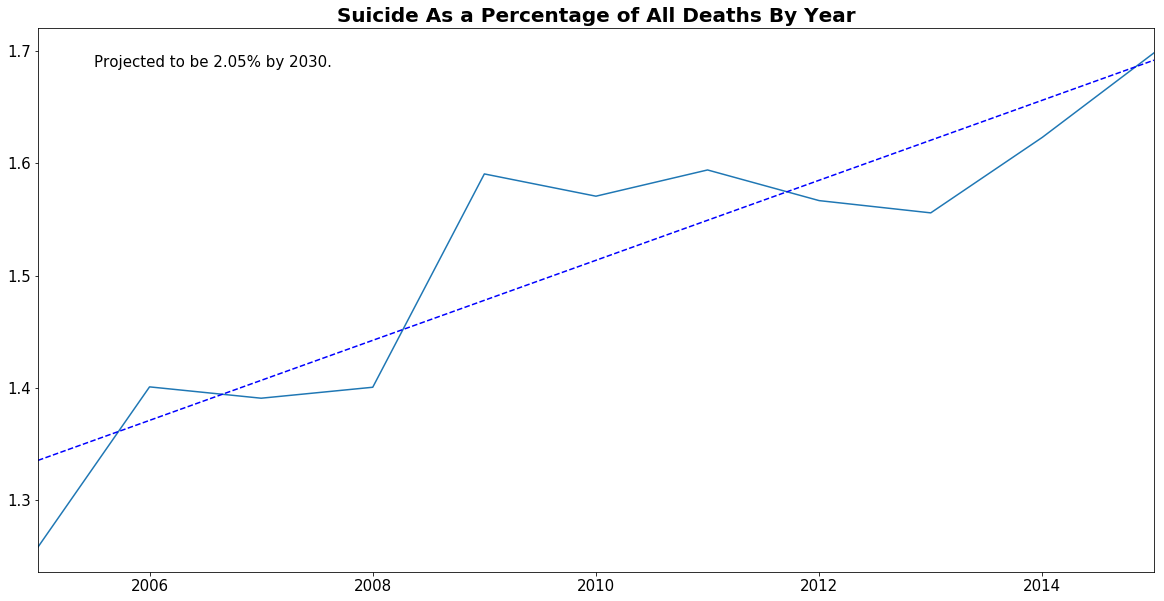

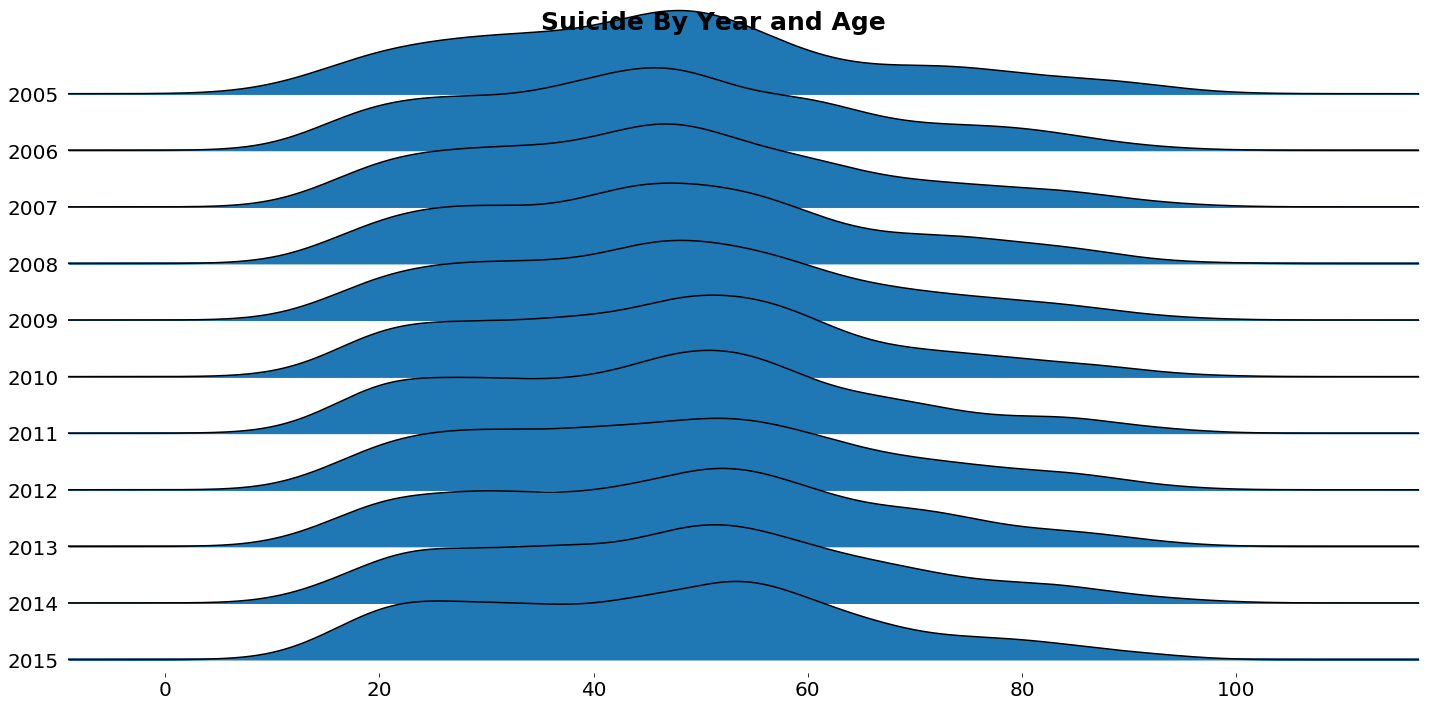

In [2]:
# Identify trend in suicide as a percentage of all deaths
# Groupby year to add up deaths and suicides
YearGrp = deathdf.groupby(["current_data_year"])

# Grouped series that are the sum of their dummies
# adding all together to find percentages
SuicideCount = YearGrp["SuicideCnt"].sum()
OtherCount = YearGrp["OtherCnt"].sum()
AllDeaths = SuicideCount + OtherCount
SuiPercent = (SuicideCount / AllDeaths)*100

# DataFrame out of grouped series
SuicideByYear = pd.DataFrame({"Suicide": SuicideCount,
                             "Other": OtherCount,
                              "Total Deaths": AllDeaths,
                             "Suicide Percent": SuiPercent})
SuicideByYear = SuicideByYear.reset_index()

# Linear regression code
year = SuicideByYear["current_data_year"]
suiper = SuicideByYear["Suicide Percent"]
sp_slope, sp_int, _, _, _ =stats.linregress(year, suiper)
sp_fit = sp_slope * year + sp_int
projyear = 2030
projected = round((sp_slope * 2025 + sp_int), 2)

# string for linear regression equation
# to be used within suicide percentage by year
textstr = "Projected to be " + str(projected) + "% by " + str(projyear) + "."

# plotting line chart with linear regression
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xlim(min(year), max(year))
ax1.plot(year, suiper)
ax1.plot(year, sp_fit, "b--")
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=15,
        verticalalignment='top')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title("Suicide As a Percentage of All Deaths By Year", fontsize=20, fontweight="bold")
plt.savefig("suiPercByYear.png")

# joypy graph
#   TODO   make this more apparent in what its showing or remove it?
yearAge = SuiOnly[["current_data_year", "detail_age"]]
yearAge["current_data_year"] = yearAge["current_data_year"].astype(str)
fig, ax4 = joypy.joyplot(yearAge, by="current_data_year", figsize=(20,10),
                        ylabelsize=20, xlabelsize=20)
fig.suptitle("Suicide By Year and Age", fontsize=25, fontweight="bold")

# financial crisis caused 5000 suicides https://money.cnn.com/2013/09/18/news/economy/financial-crisis-suicide/

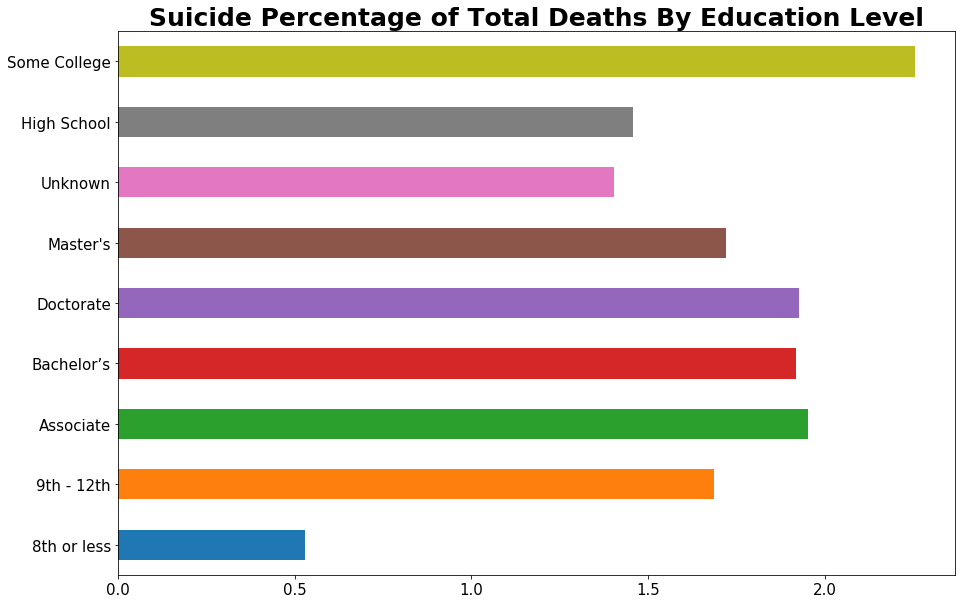

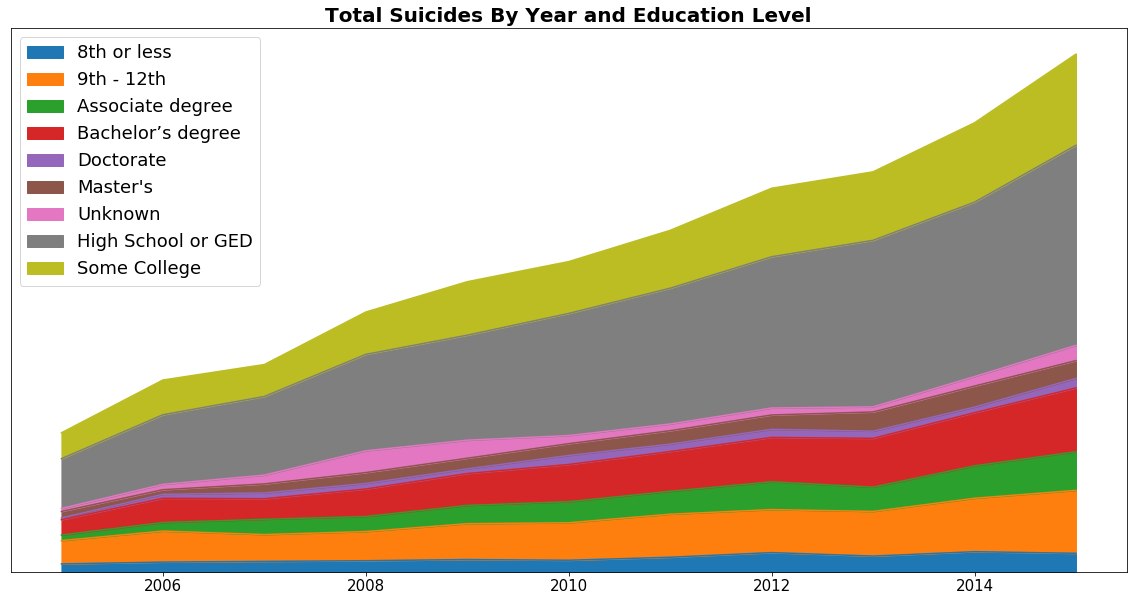

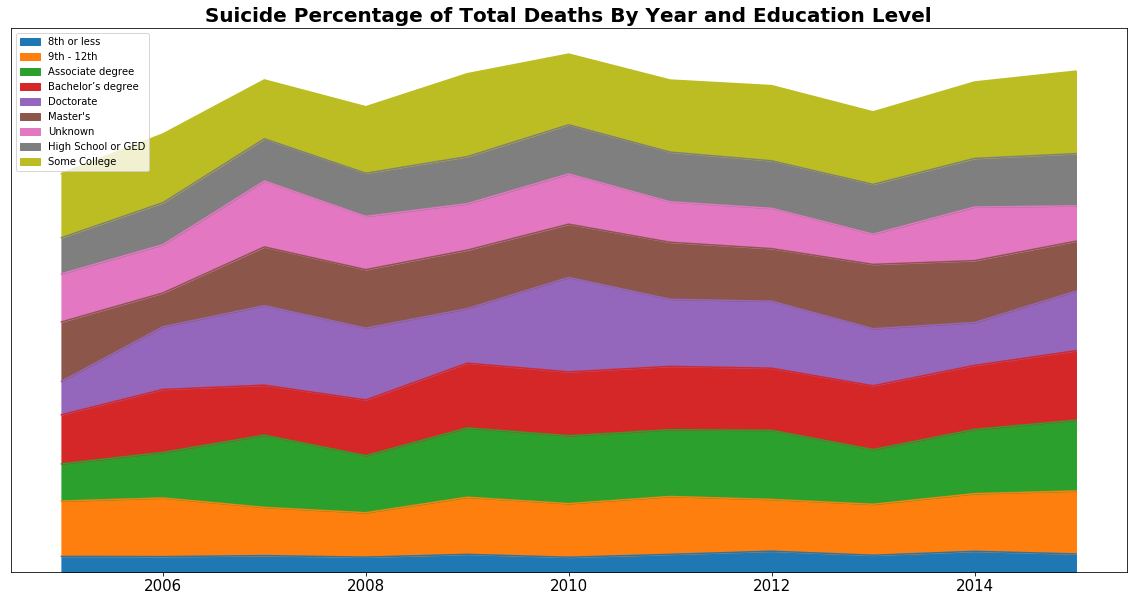

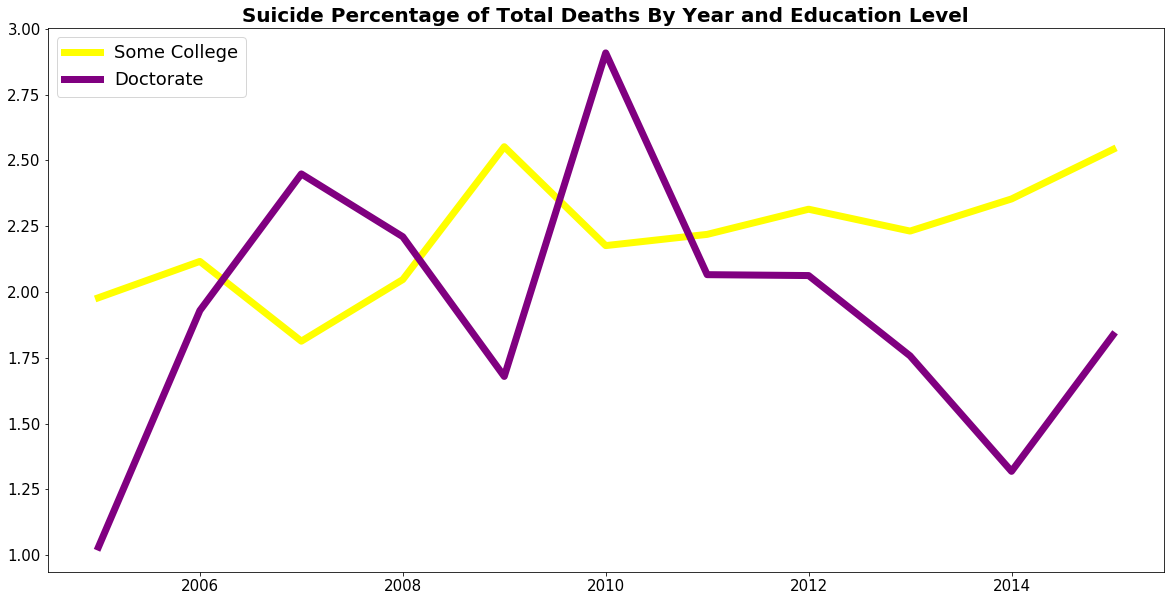

In [22]:
#create education groupby to identify suicide percentage by education group
# education groupby
EdGroup = deathdf.groupby(["Education"])

# Grouped series that are the sum of their dummies
# adding all together to find percentages
EdSuiCnt = EdGroup["SuicideCnt"].sum()
EdOtherCnt = EdGroup["OtherCnt"].sum()
EdAll = EdSuiCnt + EdOtherCnt
EdSuiPercent = (EdSuiCnt / EdAll)*100

# DataFrame out of grouped series
SuicideByEducation = pd.DataFrame({"Suicide": EdSuiCnt,
                                  "Other": EdOtherCnt,
                                  "Suicide Percent":EdSuiPercent})

# This is to rename the labels on the graph.  Stupid way to do it
# but is was done at the end of the project.

MergeEd  = pd.DataFrame({"original": ["8th grade or less", "9 - 12th grade, no diploma","Associate degree",
            "Bachelor’s degree","Doctorate or professional degree","Master’s degree","Unknown",
            "high school graduate or GED completed","some college credit, but no degree"], 
            "New": ["8th or less", "9th - 12th","Associate","Bachelor’s","Doctorate",
                    "Master's","Unknown","High School","Some College"]})
SuicideByEducation = SuicideByEducation.merge(MergeEd, left_on="Education", right_on="original")

SuicideByEducation.plot(kind="barh", x= "New", y="Suicide Percent", legend=False, figsize=(15, 10))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel("")
plt.title("Suicide Percentage of Total Deaths By Education Level", fontsize=25, fontweight="bold")
plt.savefig("SuiByEd.png")

# education groupby on only suicides
EdYearGroup = SuiOnly.groupby(["current_data_year"])

# summing the dummies according to the groupby
eighth = EdYearGroup["8th grade or less"].sum()
ninth = EdYearGroup["9 - 12th grade, no diploma"].sum()
assoc = EdYearGroup["Associate degree"].sum()
bach = EdYearGroup["Bachelor’s degree"].sum()
doc = EdYearGroup["Doctorate or professional degree"].sum()
mas = EdYearGroup["Master’s degree"].sum()
unkwn = EdYearGroup["Unknown"].sum()
hs = EdYearGroup["high school graduate or GED completed"].sum()
some = EdYearGroup["some college credit, but no degree"].sum()

# dataframe of suicide only groupbys
EdYeardf = pd.DataFrame({"8th or less": eighth,
                        "9th - 12th": ninth,
                        "Associate degree": assoc,
                        "Bachelor’s degree":bach,
                        "Doctorate": doc,
                        "Master's":mas,
                        "Unknown": unkwn,
                        "High School or GED": hs,
                        "Some College":some})
EdYeardf.plot.area(figsize=(20, 10))
plt.tick_params(axis='x', which='major', labelsize=15)
plt.legend(loc=2, prop={'size': 18})
plt.tick_params(axis='y', which='both', right='off', left='off', labelleft='off')
plt.xlabel("")
plt.title("Total Suicides By Year and Education Level", fontsize=20, fontweight="bold")
plt.savefig("SuiByYearEd.png")

# education groupby on only suicides
EdYearGroupOther = OtherOnly.groupby(["current_data_year"])

# summing dummies according to groupbys
eighthother = EdYearGroupOther["8th grade or less"].sum()
ninthother = EdYearGroupOther["9 - 12th grade, no diploma"].sum()
assocother = EdYearGroupOther["Associate degree"].sum()
bachother = EdYearGroupOther["Bachelor’s degree"].sum()
docother = EdYearGroupOther["Doctorate or professional degree"].sum()
masother = EdYearGroupOther["Master’s degree"].sum()
unkwnother = EdYearGroupOther["Unknown"].sum()
hsother = EdYearGroupOther["high school graduate or GED completed"].sum()
someother = EdYearGroupOther["some college credit, but no degree"].sum()

# dataframe of year education groupby on other deaths
EdYeardfOther = pd.DataFrame({"8th or less": eighthother,
                        "9th - 12th": ninthother,
                        "Associate degree": assocother,
                        "Bachelor’s degree":bachother,
                        "Doctorate": docother,
                        "Master's":masother,
                        "Unknown": unkwnother,
                        "High School or GED": hsother,
                        "Some College":someother})

# merging the two dataframes together
# why did I do this this way??
EdYeardfAll = EdYeardf.merge(EdYeardfOther, left_index=True, right_index=True, suffixes=("","_O"))

# making percentage columns
EdYeardfAll["8thPer"] = (EdYeardfAll["8th or less"] / (EdYeardfAll["8th or less"] + EdYeardfAll["8th or less_O"]))*100
EdYeardfAll["9thPer"] = (EdYeardfAll["9th - 12th"] / (EdYeardfAll["9th - 12th"] + EdYeardfAll["9th - 12th_O"]))*100
EdYeardfAll["asscPer"] = (EdYeardfAll["Associate degree"] / (EdYeardfAll["Associate degree"] + EdYeardfAll["Associate degree_O"]))*100
EdYeardfAll["bachPer"] = (EdYeardfAll["Bachelor’s degree"] / (EdYeardfAll["Bachelor’s degree"] + EdYeardfAll["Bachelor’s degree_O"]))*100
EdYeardfAll["docPer"] = (EdYeardfAll["Doctorate"] / (EdYeardfAll["Doctorate"] + EdYeardfAll["Doctorate_O"]))*100
EdYeardfAll["masPer"] = (EdYeardfAll["Master's"] / (EdYeardfAll["Master's"] + EdYeardfAll["Master's_O"]))*100
EdYeardfAll["unkPer"] = (EdYeardfAll["Unknown"] / (EdYeardfAll["Unknown"] + EdYeardfAll["Unknown_O"]))*100
EdYeardfAll["hsPer"] = (EdYeardfAll["High School or GED"] / (EdYeardfAll["High School or GED"] + EdYeardfAll["High School or GED_O"]))*100
EdYeardfAll["somePer"] = (EdYeardfAll["Some College"] / (EdYeardfAll["Some College"] + EdYeardfAll["Some College_O"]))*100

# dropping the columns we don't need
EdYeardfAll = EdYeardfAll.drop(["8th or less", "8th or less_O",
                               "9th - 12th","9th - 12th_O",
                               "Associate degree", "Associate degree_O",
                               "Bachelor’s degree", "Bachelor’s degree_O",
                               "Doctorate", "Doctorate_O",
                               "Master's", "Master's_O",
                               "Unknown", "Unknown_O",
                               "High School or GED", "High School or GED_O",
                               "Some College", "Some College_O"], axis=1)

# renaming the remaining columns for graph aesthetics
EdYeardfAll = EdYeardfAll.rename(columns={"8thPer": "8th or less",
                                         "9thPer": "9th - 12th",
                                         "asscPer": "Associate degree",
                                         "bachPer": "Bachelor’s degree",
                                         "docPer": "Doctorate",
                                         "masPer": "Master's",
                                         "unkPer": "Unknown",
                                         "hsPer": "High School or GED",
                                         "somePer": "Some College"})
# area chart of suicide by education level
EdYeardfAll.plot.area(figsize=(20, 10))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='y', which='both', right='off', left='off', labelleft='off')
plt.xlabel("")
plt.title("Suicide Percentage of Total Deaths By Year and Education Level", fontsize=20, fontweight="bold")
plt.savefig("SuiPercByYearEd.png")

# line chart of suicide by education level
colors = ["yellow", "purple"]
lineed = EdYeardfAll[["Some College", "Doctorate"]]
lineed.plot.line(figsize=(20, 10), color=colors, linewidth=7.0)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc=2, prop={'size': 18})
plt.xlabel("")
plt.title("Suicide Percentage of Total Deaths By Year and Education Level", fontsize=20, fontweight="bold")
plt.savefig("SuiPercByYearEdDocSomeCol.png")


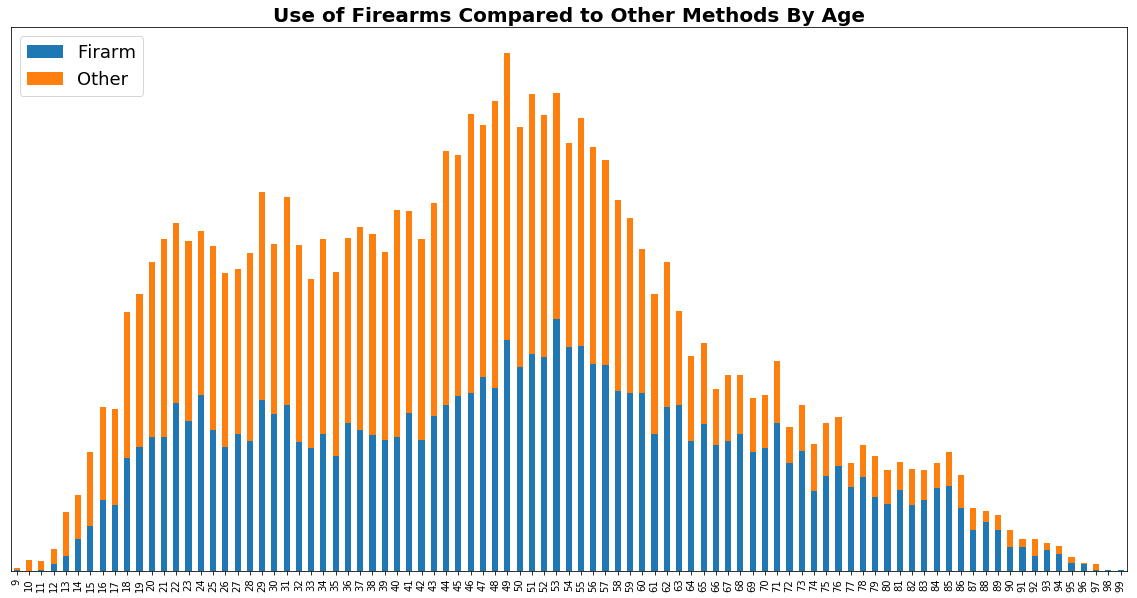

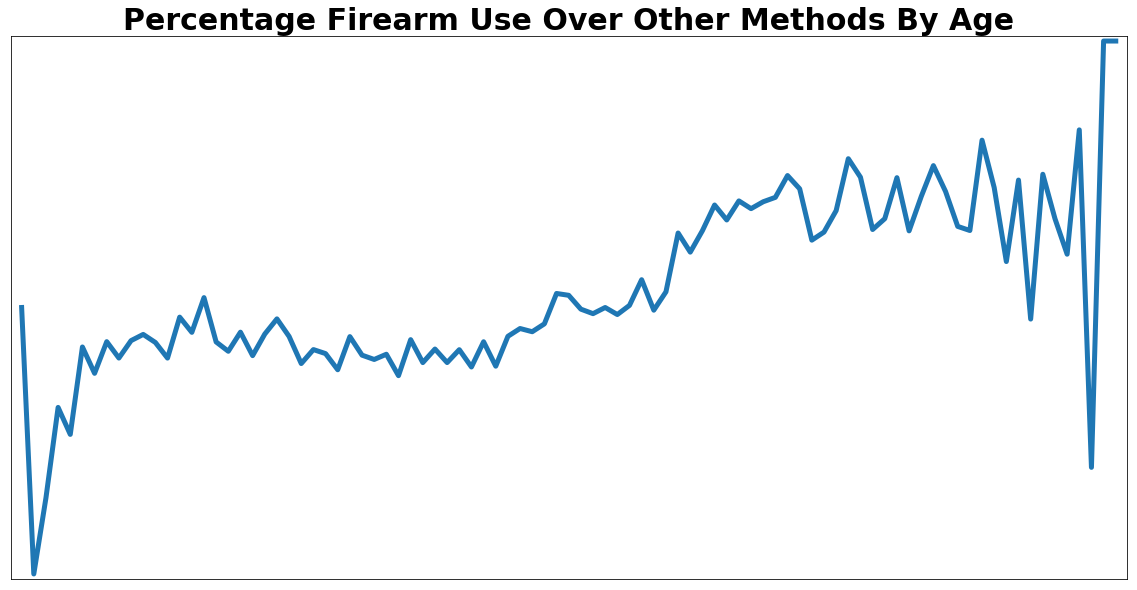

In [23]:
AgeGroup = SuiOnly.groupby(["detail_age"])

FireArmCnt = AgeGroup["FirearmCnt"].sum()
NonFireArmCnt = AgeGroup["NonFirearmCnt"].sum()
AllSuicides = FireArmCnt + NonFireArmCnt
FireArmPercent = (FireArmCnt/AllSuicides)*100

MthdByAge = pd.DataFrame({"Firarm":FireArmCnt,
                        "Other":NonFireArmCnt})

MthdByAge.plot(kind="bar", stacked=True, figsize=(20, 10))
plt.xlabel("")
plt.tick_params(axis='x', which='both', rotation=90)
plt.tick_params(axis='y', which='both', right='off', left='off', labelleft='off')
plt.legend(loc=2, prop={'size': 18})
plt.title("Use of Firearms Compared to Other Methods By Age", fontsize=20, fontweight="bold")
plt.savefig("SuiByFire.png")

FireArmPerdf = pd.DataFrame(FireArmPercent)
FireArmPerdf.plot(kind="line", legend=False, figsize=(20, 10), linewidth=5.0)
plt.title("Percentage Firearm Use Over Other Methods By Age", fontsize=30, fontweight="bold")
plt.tick_params(axis='y', which='both', right='off', left='off', labelleft='off')
plt.xlabel("")
plt.margins(0.01)
plt.tick_params(axis='x', which='both', bottom=False,  top=False,  labelbottom=False)
plt.savefig("SuiPerByFire.png")



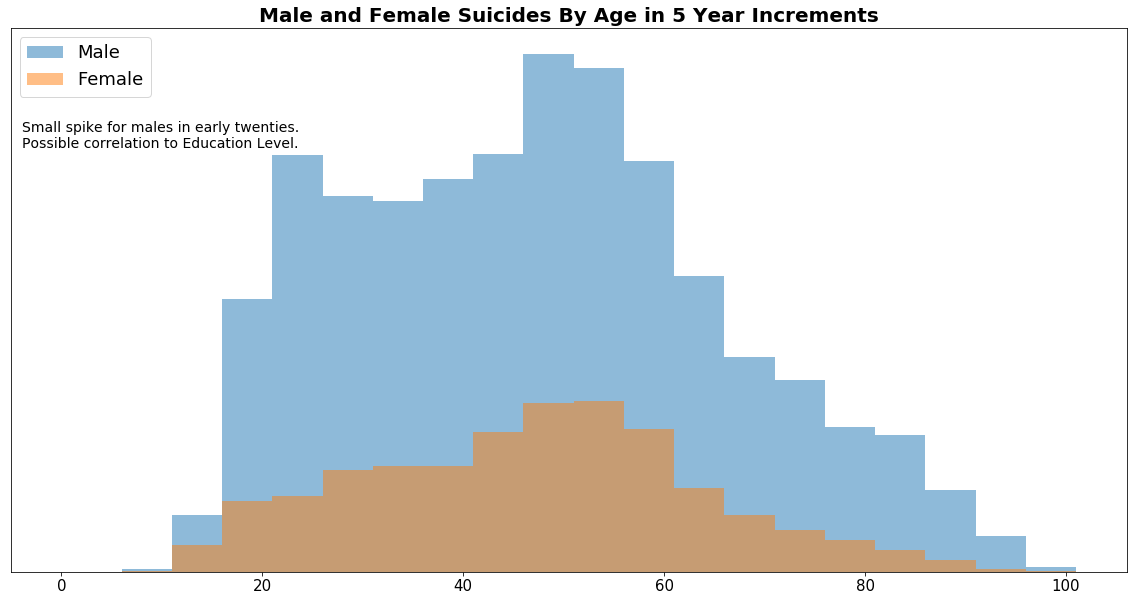

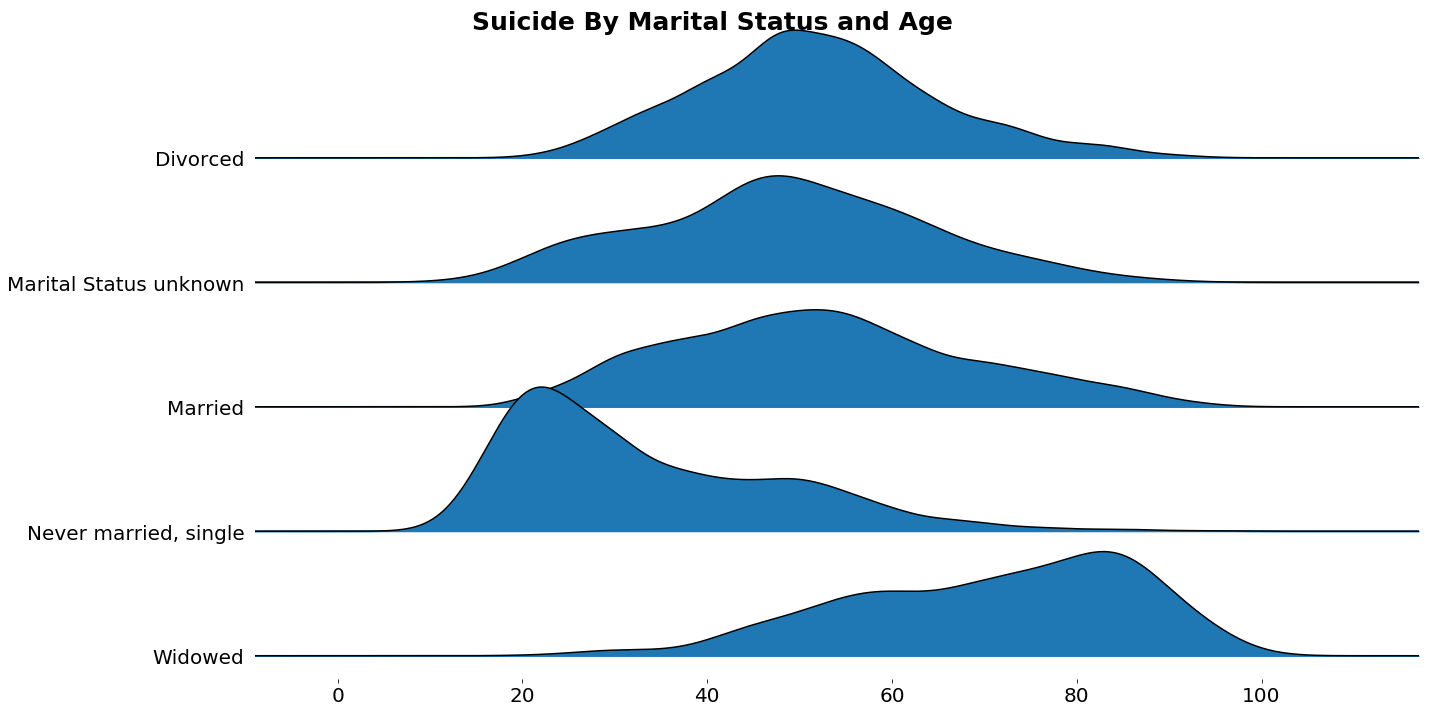

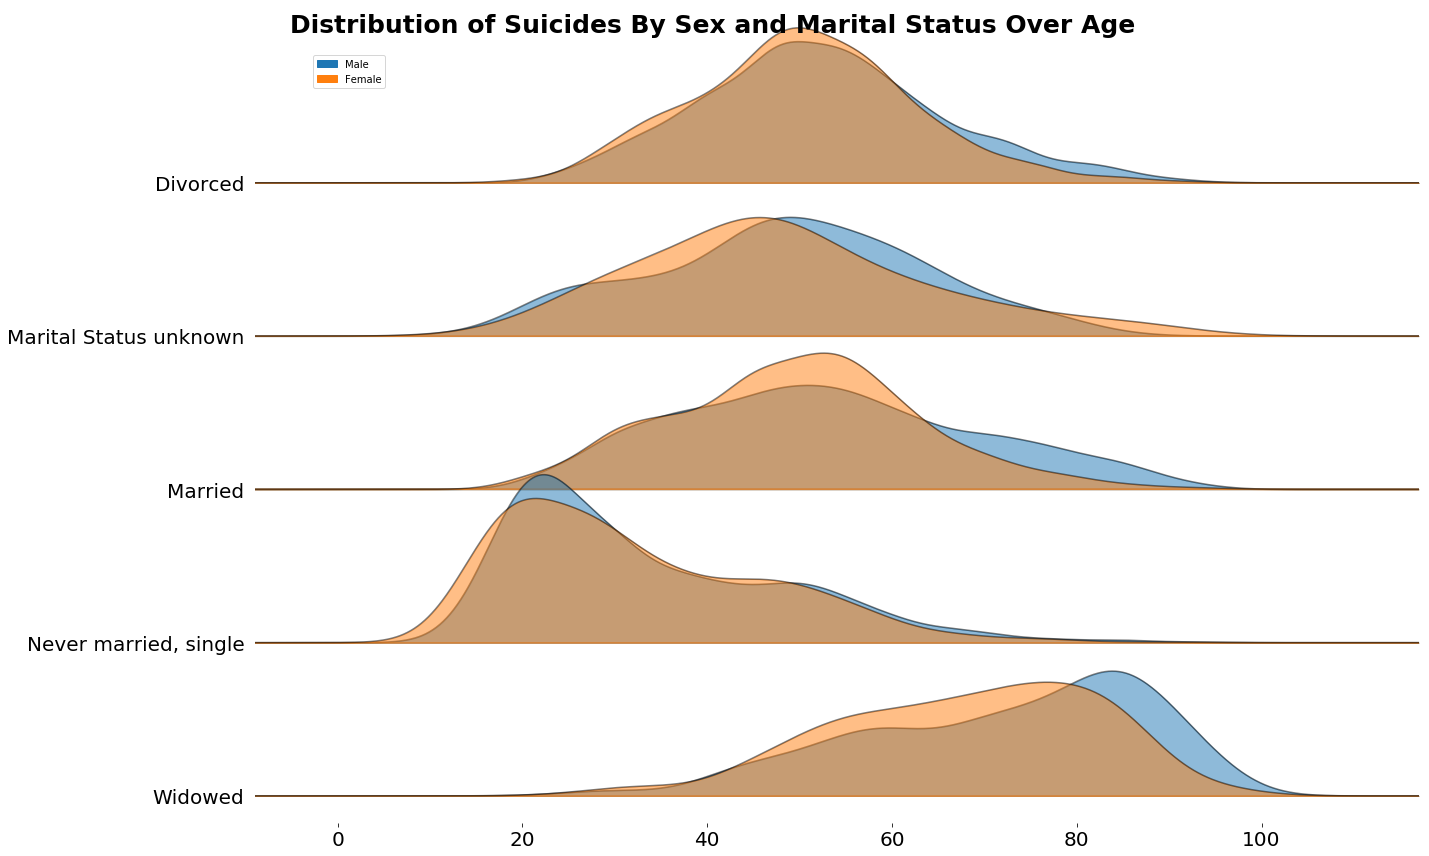

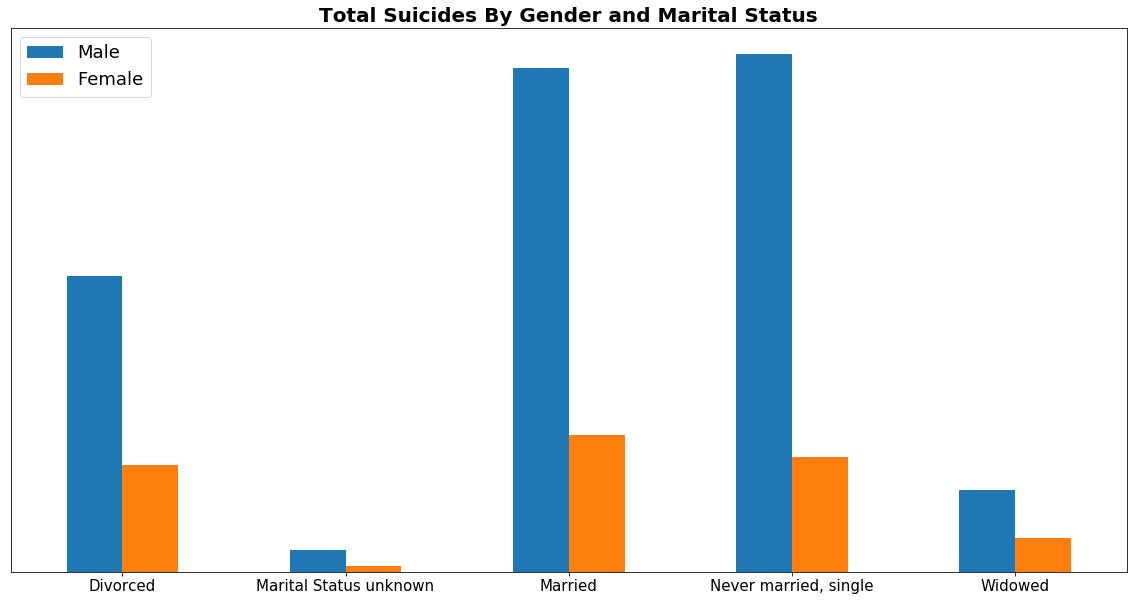

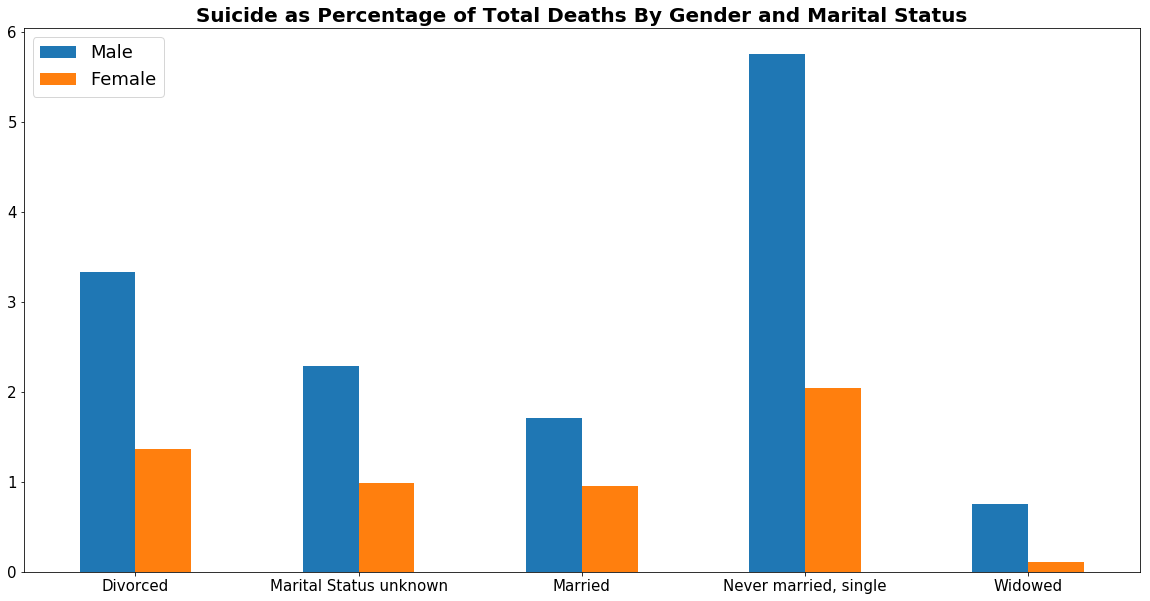

In [6]:
bins = [0, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101]

female = SuiOnly[SuiOnly["Female"] == 1]
femaleage = female["detail_age"]

male = SuiOnly[SuiOnly["Male"] == 1]
maleage = male["detail_age"]

fig, ax1 = plt.subplots(figsize=(20, 10))
plt.hist(maleage, bins=bins, alpha=0.5, label="Male")
plt.hist(femaleage, bins=bins, alpha=0.5, label="Female")
plt.title("Male and Female Suicides By Age in 5 Year Increments", fontsize=20, fontweight="bold")
plt.legend(loc=2, prop={'size': 18})
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='both', right='off', left='off', labelleft='off')
textstr = "Small spike for males in early twenties.  \nPossible correlation to Education Level."
plt.text(0.01, 0.83, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top')
plt.savefig("SuiGenHisto.png")

# Suicide by Marital Status and Age
marAge = SuiOnly[["Marital Status", "detail_age"]]
fig, ax3 = joypy.joyplot(marAge, by="Marital Status", figsize=(20,10),
                        ylabelsize=20, xlabelsize=20)
fig.suptitle("Suicide By Marital Status and Age", fontsize=25, fontweight="bold")

# Distribution of Sex and Marital Status Over Age
agesex = SuiOnly[["Marital Status", "Male", "Female", "detail_age"]]
agesex["MaleAge"] = agesex["Male"] * agesex["detail_age"]
agesex["FemaleAge"] = agesex["Female"] * agesex["detail_age"]
agesex = agesex.replace(0, agesex.replace([0], [None]))
agesex = agesex.drop(["Male", "Female", "detail_age"], axis=1)
agesex = agesex.rename(columns={"MaleAge": "Male", "FemaleAge": "Female"})

fig, ax4 = joypy.joyplot(agesex, by="Marital Status", figsize=(20,12),
                        ylabelsize=20, xlabelsize=20, alpha=0.5, legend=True, loc=(.05, .60))
fig.suptitle("Distribution of Suicides By Sex and Marital Status Over Age", fontsize=25, fontweight="bold")
plt.savefig("SuiGenDistr.png")



marGroup = SuiOnly.groupby(["Marital Status"])

femalemar = marGroup["Female"].sum()
malemar = marGroup["Male"].sum()

marGroupdf = pd.DataFrame({"Male": malemar,
                           "Female": femalemar})


marGroupother = OtherOnly.groupby(["Marital Status"])
femalemarother = marGroupother["Female"].sum()
malemarother = marGroupother["Male"].sum()

marGroupPerc = pd.DataFrame({"Male_S": malemar,
                            "Female_S": femalemar,
                            "Male_O": malemarother,
                            "Female_O": femalemarother})
marGroupPerc["Male"] = (marGroupPerc["Male_S"] / (marGroupPerc["Male_S"] + marGroupPerc["Male_O"]))*100
marGroupPerc["Female"] = (marGroupPerc["Female_S"] / (marGroupPerc["Female_S"] + marGroupPerc["Female_O"]))*100

marGroupPerc = marGroupPerc[["Male", "Female"]]


marGroupdf.plot(kind="bar", figsize=(20, 10))
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='both', right='off', left='off', labelleft='off')
plt.xlabel("")
plt.xticks(rotation=0)
plt.legend(loc=2, prop={'size': 18})
plt.title("Total Suicides By Gender and Marital Status", fontsize=20, fontweight="bold")
plt.savefig("SuiByGenMar.png")

marGroupPerc.plot(kind="bar", figsize=(20, 10))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("")
plt.xticks(rotation=0)
plt.legend(loc=2, prop={'size': 18})
plt.title("Suicide as Percentage of Total Deaths By Gender and Marital Status", fontsize=20, fontweight="bold")
plt.savefig("SuiPercByGenMar.png")

In [ ]:
# SuiOnly.dtypes

In [ ]:
# corr1 = SuiOnly[["Female", "Male", "D", "M", "S", "U", "W", "Method", "detail_age", "8th grade or less",
#                 "9 - 12th grade, no diploma", "Associate degree", "Bachelor’s degree", "Doctorate or professional degree",
#                 "Master’s degree", "Unknown", "high school graduate or GED completed", "some college credit, but no degree"]]

# corr2 = deathdf[["Female","D", "M", "S", "U", "W", "detail_age", "8th grade or less",
#                 "9 - 12th grade, no diploma", "Associate degree", "Bachelor’s degree", "Doctorate or professional degree",
#                 "Master’s degree", "Unknown", "high school graduate or GED completed", "some college credit, but no degree"]]

# # look at coefficient 
# from matplotlib.pyplot import figure

# plt.matshow(corr2.corr())
# figure(figsize=(20,10))
# plt.show()

In [ ]:
# #correlation with target
# from scipy.stats import spearmanr
# labels = []
# values = []



# for col in corrsampdf.sample(frac=.01).columns:
#     labels.append(col)
#     values.append(spearmanr(corrsampdf[col].values, corrsampdf['SuicideYN'].values)[0])
        
        
# corr_df = pd.DataFrame({'col_labels': labels, 'corr_values' : values})
# corr_df = corr_df.sort_values(by='corr_values')


# # look at this by different decimal numbers
# corr_df = corr_df[(corr_df['corr_values']>0.03) | (corr_df['corr_values']<-0.03)]

# ind = np.arange(corr_df.shape[0])
# width = 0.9
# fig, ax = plt.subplots(figsize=(12,12))
# rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='darkseagreen')
# ax.set_yticks(ind)
# ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
# ax.set_xlabel("Correlation coefficient")
# ax.set_title("Variable correlation to Target")
# plt.show()

In [ ]:
# corr_df = deathdf[["Female", "Male", "D", "M", "S", "U", "W", "Method", "detail_age", 
#                    "8th grade or less", "9 - 12th grade, no diploma", "Associate degree", 
#                    "Bachelor’s degree", "Doctorate or professional degree", "Master’s degree", "Unknown", 
#                    "high school graduate or GED completed", "some college credit, but no degree", "SuicideYN"]]

# corrsampdf = corr_df.sample(n=100000)
# corrsampdf

In [ ]:
#correlation with target
#from scipy.stats import spearmanr
#labels = []
#values = []
#corr_df = deathdf[["Female", "Male", "D", "M", "S", "U", "W", "Method", "detail_age", "8th grade or less",
#                "9 - 12th grade, no diploma", "Associate degree", "Bachelor’s degree", "Doctorate or professional degree",
#                "Master’s degree", "Unknown", "high school graduate or GED completed", "some college credit, but no degree",
#        "SuicideYN"]]

In [ ]:
# from scipy.stats import spearmanr
# spearmanr(corrsampdf["SuicideYN"], corrsampdf["Female"])[0]

In [ ]:
# spearmanr(corrsampdf["SuicideYN"], corrsampdf["Male"])[0]

In [ ]:
# corr3 = SuiOnly[["Male", "Female", "M", "S", "U", "W", "8th grade or less", 
#                  "9 - 12th grade, no diploma", "Associate degree", "Bachelor’s degree", 
#                  "Doctorate or professional degree", "Master’s degree", "Unknown", 
#                  "high school graduate or GED completed", "some college credit, but no degree"]]

# plt.matshow(corr3.corr())
# figure(figsize=(20,10))
# plt.show()

In [7]:
animals = pd.DataFrame({"Animals":["Bird", "Cat", "Dog", "Pig"],
                       "Gender": ["M", "F", "M", "F"]})
animals

,Animals,Gender
0,Bird,M
1,Cat,F
2,Dog,M
3,Pig,F


In [8]:
gendummies = pd.get_dummies(animals["Gender"])
animals = animals.join(gendummies)

animals

,Animals,Gender,F,M
0,Bird,M,0,1
1,Cat,F,1,0
2,Dog,M,0,1
3,Pig,F,1,0


,0,Per Change
detail_age,,
9,NaN,NaN
10,-1.000000,-1.000000
11,inf,inf
12,1.187500,1.187500
13,-0.161905,-0.161905
14,0.626263,0.626263
15,-0.116113,-0.116113
16,0.157853,0.157853
17,-0.070487,-0.070487


In [7]:
# education groupby on only suicides
EdYearGroup = SuiOnly.groupby(["current_data_year"])

# summing the dummies according to the groupby
eighth = EdYearGroup["8th grade or less"].sum()
ninth = EdYearGroup["9 - 12th grade, no diploma"].sum()
assoc = EdYearGroup["Associate degree"].sum()
bach = EdYearGroup["Bachelor’s degree"].sum()
doc = EdYearGroup["Doctorate or professional degree"].sum()
mas = EdYearGroup["Master’s degree"].sum()
unkwn = EdYearGroup["Unknown"].sum()
hs = EdYearGroup["high school graduate or GED completed"].sum()
some = EdYearGroup["some college credit, but no degree"].sum()

# dataframe of suicide only groupbys
EdYeardf = pd.DataFrame({"8th or less": eighth,
                        "9th - 12th": ninth,
                        "Associate degree": assoc,
                        "Bachelor’s degree":bach,
                        "Doctorate": doc,
                        "Master's":mas,
                        "Unknown": unkwn,
                        "High School or GED": hs,
                        "Some College":some})
EdYeardf

,8th or less,9th - 12th,Associate degree,Bachelor’s degree,Doctorate,Master's,Unknown,High School or GED,Some College
current_data_year,,,,,,,,,
2005,34,101.0,24,66.0,8,28,13,215.0,112.0
2006,42,134.0,37,105.0,17,20,23,301.0,150.0
2007,45,116.0,66,89.0,25,39,38,340.0,138.0
2008,48,126.0,65,119.0,24,47,94,417.0,183.0
2009,53,155.0,79,138.0,20,46,78,454.0,231.0
2010,50,162.0,91,161.0,39,51,35,528.0,224.0
2011,63,186.0,99,172.0,32,58,29,587.0,250.0
2012,83,186.0,120,192.0,35,62,30,654.0,296.0
2013,68,193.0,105,211.0,31,83,22,720.0,296.0


In [8]:
edyear2 = EdYeardf.iloc[[0, -1]]
edyear2

,8th or less,9th - 12th,Associate degree,Bachelor’s degree,Doctorate,Master's,Unknown,High School or GED,Some College
current_data_year,,,,,,,,,
2005,34,101.0,24,66.0,8,28,13,215.0,112.0
2015,80,272.0,167,276.0,41,77,66,865.0,394.0


In [9]:
edyear2per = edyear2.pct_change()
edyear2per

,8th or less,9th - 12th,Associate degree,Bachelor’s degree,Doctorate,Master's,Unknown,High School or GED,Some College
current_data_year,,,,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,1.352941,1.693069,5.958333,3.181818,4.125,1.75,4.076923,3.023256,2.517857


In [10]:
# Suicide rate change 05-15 by ed group
# 8th - 1.35
# 9-12 - 1.69
# Assoc - 5.95
# Bach - 3.18
# Doc - 4.13
# Mas - 1.75
# Unk - 4.07
# hs - 3.02
# Some Col - 2.52

In [12]:
GenSui = SuiOnly[["Male", "Female", "detail_age"]]
GenSui.head()

,Male,Female,detail_age
71,1,0,71
92,1,0,55
139,0,1,32
148,1,0,89
165,0,1,75


20

In [7]:
# Pct Change Demo
import pandas as pd

YearMoney = pd.DataFrame({"Year":["2005", "2006", "2007", "2008"],
                  "Money":[200, 250, 180, 300]})
YearMoney = YearMoney.set_index("Year")
YearMoney

,Money
Year,
2005,200
2006,250
2007,180
2008,300


In [10]:
YearMoney = YearMoney.pct_change()
YearMoney

,Money
Year,
2005,NaN
2006,0.250000
2007,-0.280000
2008,0.666667


In [2]:
deathdf.dtypes

Unnamed: 0                                 int64
113_cause_recode                           int64
130_infant_cause_recode                  float64
358_cause_recode                         float64
39_cause_recode                          float64
Unnamed: 0.1                               int64
Unnamed: 0.1.1                           float64
activity_code                            float64
age_recode_12                            float64
age_recode_27                            float64
age_recode_52                            float64
autopsy                                   object
current_data_year                          int64
day_of_week_of_death                       int64
detail_age                                 int64
detail_age_type                          float64
education_2003_revision                  float64
hispanic_origin                          float64
hispanic_originrace_recode                 int64
icd_code_10th_revision                    object
infant_age_recode_22

In [3]:
check = deathdf["Education"].value_counts()
check

high school graduate or GED completed    400493
8th grade or less                        123258
some college credit, but no degree       116041
9 - 12th grade, no diploma               110458
Bachelor’s degree                         91732
Associate degree                          50867
Master’s degree                           34977
Unknown                                   33413
Doctorate or professional degree          15359
Name: Education, dtype: int64

In [5]:
SuicideByEducation

,Suicide,Other,Suicide Percent
Education,,,
8th grade or less,653,122605,0.529783
"9 - 12th grade, no diploma",1862,108596,1.685709
Associate degree,993,49874,1.952150
Bachelor’s degree,1759,89973,1.917542
Doctorate or professional degree,296,15063,1.927209
Master’s degree,602,34375,1.721131
Unknown,469,32944,1.403645
high school graduate or GED completed,5835,394658,1.456954
"some college credit, but no degree",2617,113424,2.255237


In [6]:
SuicideByEducation = SuicideByEducation.reset_index()

In [7]:
SuicideByEducation

,Education,Suicide,Other,Suicide Percent
0,8th grade or less,653,122605,0.529783
1,"9 - 12th grade, no diploma",1862,108596,1.685709
2,Associate degree,993,49874,1.952150
3,Bachelor’s degree,1759,89973,1.917542
4,Doctorate or professional degree,296,15063,1.927209
5,Master’s degree,602,34375,1.721131
6,Unknown,469,32944,1.403645
7,high school graduate or GED completed,5835,394658,1.456954
8,"some college credit, but no degree",2617,113424,2.255237


In [15]:
MergeEd  = pd.DataFrame({"original": ["8th grade or less", "9 - 12th grade, no diploma","Associate degree",
            "Bachelor’s degree","Doctorate or professional degree","Master’s degree","Unknown",
            "high school graduate or GED completed","some college credit, but no degree"], 
            "New": ["8th or less", "9th - 12th","Associate degree","Bachelor’s degree","Doctorate",
                    "Master's","Unknown","High School or GED","Some College"]})
MergeEd

,original,New
0,8th grade or less,8th or less
1,"9 - 12th grade, no diploma",9th - 12th
2,Associate degree,Associate degree
3,Bachelor’s degree,Bachelor’s degree
4,Doctorate or professional degree,Doctorate
5,Master’s degree,Master's
6,Unknown,Unknown
7,high school graduate or GED completed,High School or GED
8,"some college credit, but no degree",Some College


In [16]:
SuicideByEducation = SuicideByEducation.merge(MergeEd, left_on="Education", right_on="original")
SuicideByEducation

,Suicide,Other,Suicide Percent,original,New
0,653,122605,0.529783,8th grade or less,8th or less
1,1862,108596,1.685709,"9 - 12th grade, no diploma",9th - 12th
2,993,49874,1.952150,Associate degree,Associate degree
3,1759,89973,1.917542,Bachelor’s degree,Bachelor’s degree
4,296,15063,1.927209,Doctorate or professional degree,Doctorate
5,602,34375,1.721131,Master’s degree,Master's
6,469,32944,1.403645,Unknown,Unknown
7,5835,394658,1.456954,high school graduate or GED completed,High School or GED
8,2617,113424,2.255237,"some college credit, but no degree",Some College


In [29]:
bins = [0, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101]
labels = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50",
         "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "81-85", "86-90", "91-96", "96-100"]

SuiOnly["AgeBin"] = pd.cut(SuiOnly["detail_age"], bins=bins, labels=labels)
SuiOnly

,Unnamed: 0,113_cause_recode,130_infant_cause_recode,358_cause_recode,39_cause_recode,Unnamed: 0.1,Unnamed: 0.1.1,activity_code,age_recode_12,age_recode_27,...,high school graduate or GED completed,"some college credit, but no degree",Female,Male,D,M,S,U,W,AgeBin
71,1275,125,NaN,NaN,NaN,5119894,5119894.0,9.0,NaN,NaN,...,1,0,0,1,1,0,0,0,0,66-70
92,1752,126,NaN,NaN,NaN,10729920,10729920.0,9.0,NaN,NaN,...,1,0,0,1,1,0,0,0,0,51-55
139,2714,126,NaN,NaN,NaN,2759097,2759097.0,9.0,NaN,NaN,...,1,0,1,0,1,0,0,0,0,31-35
148,2878,125,NaN,NaN,NaN,5356146,5356146.0,9.0,NaN,NaN,...,1,0,0,1,1,0,0,0,0,86-90
165,3144,126,NaN,NaN,NaN,14357797,14357797.0,9.0,NaN,NaN,...,1,0,1,0,1,0,0,0,0,71-75
201,3842,126,NaN,NaN,NaN,7648601,7648601.0,9.0,NaN,NaN,...,1,0,1,0,1,0,0,0,0,56-60
248,4741,126,NaN,NaN,NaN,2554177,2554177.0,9.0,NaN,NaN,...,1,0,0,1,1,0,0,0,0,41-45
354,6935,126,NaN,NaN,NaN,10242880,10242880.0,9.0,NaN,NaN,...,1,0,1,0,1,0,0,0,0,46-50
407,7773,125,NaN,NaN,NaN,3300039,3300039.0,9.0,NaN,NaN,...,1,0,0,1,1,0,0,0,0,51-55
497,9458,126,NaN,NaN,NaN,7597171,7597171.0,9.0,NaN,NaN,...,1,0,0,1,1,0,0,0,0,26-30


In [43]:
SuiOnlyF = SuiOnly[SuiOnly["Female"] == 1]
SuiOnlyFAge = SuiOnlyF["AgeBin"].value_counts()
SuiOnlyFAge
SuiOnlyFAgedf = pd.DataFrame(SuiOnlyFAge)
SuiOnlyFAgedf

,AgeBin
46-50,427
51-55,401
41-45,362
56-60,310
36-40,260
31-35,255
26-30,255
61-65,198
16-20,188
21-25,184


In [44]:
SuiOnlyM = SuiOnly[SuiOnly["Male"] == 1]
SuiOnlyMAge = SuiOnlyM["AgeBin"].value_counts()
SuiOnlyMAge
SuiOnlyMAgedf = pd.DataFrame(SuiOnlyMAge)
SuiOnlyMAgedf

,AgeBin
46-50,1256
51-55,1200
41-45,1062
21-25,989
36-40,970
26-30,960
56-60,929
31-35,876
16-20,769
61-65,656


In [53]:
GenMergedf = SuiOnlyMAgedf.merge(SuiOnlyFAgedf, left_index=True, right_index=True, suffixes=("_M", "_F"))
GenMergedf
GenMergedf["GirlPerOfBoys"] = round(((GenMergedf["AgeBin_F"]/GenMergedf["AgeBin_M"])*100),2)
GenMergedf = GenMergedf.sort_index()
GenMergedf

,AgeBin_M,AgeBin_F,GirlPerOfBoys
0-5,0,0,NaN
6-10,12,5,41.67
11-15,225,89,39.56
16-20,769,188,24.45
21-25,989,184,18.60
26-30,960,255,26.56
31-35,876,255,29.11
36-40,970,260,26.80
41-45,1062,362,34.09
46-50,1256,427,34.00


In [55]:
GenMergedfper = GenMergedf.pct_change()
GenMergedfper

,AgeBin_M,AgeBin_F,GirlPerOfBoys
0-5,NaN,NaN,NaN
6-10,inf,inf,NaN
11-15,17.750000,16.800000,-0.050636
16-20,2.417778,1.112360,-0.381951
21-25,0.286086,-0.021277,-0.239264
26-30,-0.029323,0.385870,0.427957
31-35,-0.087500,0.000000,0.096009
36-40,0.107306,0.019608,-0.079354
41-45,0.094845,0.392308,0.272015
46-50,0.182674,0.179558,-0.002640


In [56]:
GenMergedfper.to_csv("genmergedper.csv")

In [60]:
SuiOnlyUnder50 = SuiOnly[SuiOnly["detail_age"] <= 50]
SuiOnlyOver50 = SuiOnly[SuiOnly["detail_age"] >= 51]

gunsuiu50 = SuiOnlyUnder50["FirearmCnt"].sum()
othersuiu50 = SuiOnlyUnder50["NonFirearmCnt"].sum()
together = gunsuiu50 + othersuiu50
print(gunsuiu50/together)

0.4253095535612859


In [61]:
gunsuio50 = SuiOnlyOver50["FirearmCnt"].sum()
othersuio50 = SuiOnlyOver50["NonFirearmCnt"].sum()
togethero = gunsuio50 + othersuio50
print(gunsuio50/togethero)

0.5841158682158205


In [62]:
SuicideByEducation

,Suicide,Other,Suicide Percent,original,New
0,653,122605,0.529783,8th grade or less,8th or less
1,1862,108596,1.685709,"9 - 12th grade, no diploma",9th - 12th
2,993,49874,1.952150,Associate degree,Associate
3,1759,89973,1.917542,Bachelor’s degree,Bachelor’s
4,296,15063,1.927209,Doctorate or professional degree,Doctorate
5,602,34375,1.721131,Master’s degree,Master's
6,469,32944,1.403645,Unknown,Unknown
7,5835,394658,1.456954,high school graduate or GED completed,High School
8,2617,113424,2.255237,"some college credit, but no degree",Some College


In [68]:
EdYeardfAllper = EdYeardfAll.iloc[[0, -1]]

#EdYeardfAllper = EdYeardfAllper.pct_change()
EdYeardfAllper

,8th or less,9th - 12th,Associate degree,Bachelor’s degree,Doctorate,Master's,Unknown,High School or GED,Some College
current_data_year,,,,,,,,,
2005,0.474595,1.703779,1.145038,1.512374,1.030928,1.828870,1.482326,1.110595,1.978100
2015,0.549904,1.938979,2.179872,2.140364,1.836095,1.536926,1.088570,1.606732,2.541771


In [69]:
EdYeardfAll

,8th or less,9th - 12th,Associate degree,Bachelor’s degree,Doctorate,Master's,Unknown,High School or GED,Some College
current_data_year,,,,,,,,,
2005,0.474595,1.703779,1.145038,1.512374,1.030928,1.828870,1.482326,1.110595,1.978100
2006,0.467758,1.805200,1.404708,1.938700,1.929625,1.041124,1.487710,1.292900,2.116253
2007,0.498394,1.485085,2.223720,1.540859,2.448580,1.808905,2.030999,1.299098,1.813165
2008,0.451850,1.367039,1.758658,1.716181,2.209945,1.802147,1.637916,1.330993,2.047209
2009,0.537853,1.758167,2.135135,1.995373,1.679261,1.801802,1.428310,1.450757,2.551922
2010,0.448591,1.651208,2.089073,1.968456,2.908277,1.640399,1.547303,1.514065,2.176236
2011,0.537497,1.781951,2.056075,1.951662,2.065849,1.755979,1.245704,1.530479,2.218869
2012,0.634945,1.593830,2.128037,1.913685,2.062463,1.620068,1.240695,1.464037,2.314489
2013,0.510204,1.568723,1.685393,1.964984,1.757370,1.980907,0.930626,1.533906,2.231436
